<a href="https://colab.research.google.com/github/mannam95/Deep_Learning_Programming/blob/main/Assignment6/Assignment_6_RNN2_IDL_Meghana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Team Assignment


1.   Srinath Mannam (229750)
2.   Meghana Rao (234907)
3.   Govind Shukla (235192)


#### Import Statements

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

#### Model Config

In [ ]:
class Model:

  def __init__(self, **kwargs):
     super().__init__(**kwargs)
     self.vocab_size = 20000
     #self.vocab_size = 40000
     (self.train_sequences, self.train_labels), (self.test_sequences, self.test_labels) = tf.keras.datasets.imdb.load_data(num_words= self.vocab_size)

     print(self.train_sequences[:4])
     print(self.train_labels[:4])

     self.word_to_index = tf.keras.datasets.imdb.get_word_index()
     self.index_to_word = dict((index, word) for (word, index) in self.word_to_index.items())

     self.sequence_lengths = [len(sequence) for sequence in self.train_sequences]
     self.max_len = max(self.sequence_lengths)
     self.min_len = min(self.sequence_lengths)
     print("Max sequence length:", self.max_len)
     print("Min sequence length:", self.min_len)
     plt.hist(self.sequence_lengths, bins=100)
     plt.show()


  def gen_train(self):
    for sequence, label in zip(self.train_sequences, self.train_labels):
        yield sequence, label


  def gen_test(self):
    for sequence, label in zip(self.test_sequences, self.test_labels):
        yield sequence, label

  #-----Bucket by sequence length
  def set_train_test_data_1(self):
    buckets = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    #buckets = [100, 200, 300, 400, 500]
    bucket_batch_size = [32] * (len(buckets) + 1)
    train_data = tf.data.Dataset.from_generator(self.gen_train, output_signature=(tf.TensorSpec(shape=(None,), 
                                                                                                dtype=tf.int32), tf.TensorSpec(shape=(), dtype=tf.int32)))
    train_data = train_data.bucket_by_sequence_length(lambda sequence, label: tf.shape(sequence)[0], bucket_boundaries=buckets, bucket_batch_sizes=bucket_batch_size, drop_remainder= True)
    test_data = tf.data.Dataset.from_generator(self.gen_test, output_signature=(tf.TensorSpec(shape=(None,), 
                                                                                              dtype=tf.int32), tf.TensorSpec(shape=(), dtype=tf.int32)))
    test_data = test_data.bucket_by_sequence_length(lambda sequence, label: tf.shape(sequence)[0], bucket_boundaries=buckets, bucket_batch_sizes=bucket_batch_size, drop_remainder= True)
     
    return train_data, test_data

  #----Ragged Tensors
  def set_train_test_data_2(self):
    r_train_data = tf.ragged.constant(self.train_sequences)
    r_test_data = tf.ragged.constant(self.test_sequences)
    print(r_train_data.shape)
    print(r_train_data.bounding_shape())

    train_data=tf.data.Dataset.from_tensor_slices((r_train_data,self.train_labels)).shuffle(25000).batch(32)
    test_data=tf.data.Dataset.from_tensor_slices((r_test_data,self.test_labels)).batch(32)

    return train_data, test_data

  #-----LSTM
  def set_model_1(self):
    layer_list = [tf.keras.layers.Embedding(self.vocab_size, 32, mask_zero=True),
                 tf.keras.layers.LSTM(12, return_sequences=True),
                 tf.keras.layers.LSTM(15),
                 tf.keras.layers.Dense(1)]

    model = tf.keras.Sequential(layer_list)
    loss_fn = tf.losses.BinaryCrossentropy(from_logits=True)
    optimizer = tf.optimizers.Adam() 

    epochs = 2

    return model, loss_fn, optimizer, epochs

  #----GRU
  def set_model_2(self):
    layer_list = [tf.keras.layers.Embedding(self.vocab_size, 32, mask_zero=True),
                 tf.keras.layers.GRU(100),
                 tf.keras.layers.Dense(1)]

    model = tf.keras.Sequential(layer_list)
    loss_fn = tf.losses.BinaryCrossentropy(from_logits=True)
    optimizer = tf.optimizers.Adam() 

    epochs = 2
  
  #----GRU and LSTM
  def set_model_3(self):
    layer_list = [tf.keras.layers.Embedding(self.vocab_size, 32, mask_zero=True),
                 tf.keras.layers.GRU(512, return_sequences=True),
                 tf.keras.layers.LSTM(512),
                 tf.keras.layers.Dense(1)]

    model = tf.keras.Sequential(layer_list)
    loss_fn = tf.losses.BinaryCrossentropy(from_logits=True)
    optimizer = tf.optimizers.Adam() 

    epochs = 5

    return model, loss_fn, optimizer, epochs

  #----Bidirectional 
  def set_model_4(self):
    layer_list = [tf.keras.layers.Embedding(self.vocab_size, 32, mask_zero=True),
                 tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(60, return_sequences=True)),
                 tf.keras.layers.LSTM(15),
                 tf.keras.layers.Dense(1)]

    model = tf.keras.Sequential(layer_list)
    loss_fn = tf.losses.BinaryCrossentropy(from_logits=True)
    optimizer = tf.optimizers.Adam() 

    epochs = 3

    return model, loss_fn, optimizer, epochs

  #----LSTM 
  def set_model_5(self):
    layer_list = [tf.keras.layers.Input(shape=[None], dtype=tf.int32, ragged=True),
                  tf.keras.layers.Embedding(self.vocab_size, 32),
                  tf.keras.layers.LSTM(32, use_bias=False),
                  tf.keras.layers.Dense(32),
                  tf.keras.layers.Activation(tf.nn.relu),
                  tf.keras.layers.Dense(1)]

    model = tf.keras.Sequential(layer_list)
    loss_fn = tf.losses.BinaryCrossentropy(from_logits=True)
    optimizer = tf.optimizers.Adam() 

    epochs = 2

    return model, loss_fn, optimizer, epochs

  #---RNN  
  def set_model_6(self):
    layer_list = [tf.keras.layers.Embedding(self.vocab_size, 32, mask_zero=True),
                 tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(12)),
                 tf.keras.layers.Dense(2)]

    model = tf.keras.Sequential(layer_list)
    loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
    optimizer = tf.optimizers.Adam() 

    epochs = 3

    return model, loss_fn, optimizer, epochs

  #----Bidirectional forward and custom backward layer
  def set_model_7(self):

    forward_layer = tf.keras.layers.LSTM(10, return_sequences=True)
    backward_layer = tf.keras.layers.LSTM(10, return_sequences=True, go_backwards=True)
    layer_list = [tf.keras.layers.Embedding(self.vocab_size, 32),
                  tf.keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer),
                  tf.keras.layers.LSTM(15),
                  tf.keras.layers.Dense(1)]

    model = tf.keras.Sequential(layer_list)
    loss_fn = tf.losses.BinaryCrossentropy(from_logits=True)
    optimizer = tf.optimizers.Adam() 

    epochs = 2

    return model, loss_fn, optimizer, epochs

#### Model Compile, Fit, Evaluate

In [ ]:
def model_compile_fit_evaluate(train_data, test_data, model, loss_func, optimizer, epochs):
  #---model compile------
  model.compile(loss = loss_func,
                optimizer = optimizer,
                metrics = ['accuracy'])
  
  #---model fit------
  train_scores = model.fit(train_data, epochs=epochs)

  #---model evaluate----
  test_scores = model.evaluate(test_data)
  print("Test loss:", test_scores[0])
  print("Test accuracy:", test_scores[1])


#### Train and Test Data

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 

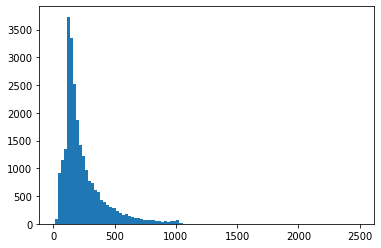

In [ ]:
model = Model()
train_data, test_data = model.set_train_test_data_1()
#train_data, test_data= model.set_train_test_data_2()

#### **Model 1**

*   LSTM (12) + LSTM (12) + Dense (1)
*   Loss Func: BinaryCrossentropy
*   Optimizer: Adam
*   Using from_generator, bucket_by_sequence_length, mask_zero = True
*   Vocab_size: 20000
*   Epochs: 2



In [ ]:
model1, model1_loss_fn, model1_optimizer, model1_epochs = model.set_model_1()
model1.summary()
model_compile_fit_evaluate(train_data, test_data, model1, model1_loss_fn, model1_optimizer, model1_epochs)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          640000    
                                                                 
 lstm_6 (LSTM)               (None, None, 12)          2160      
                                                                 
 lstm_7 (LSTM)               (None, 15)                1680      
                                                                 
 dense_3 (Dense)             (None, 1)                 16        
                                                                 
Total params: 643,856
Trainable params: 643,856
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
775/775 [==============================] - 94s 105ms/step - loss: 0.4050 - accuracy: 0.8024
Epoch 2/2
776/776 [==============================] - 39s 46ms/step - loss: 0.3

#### **Model 2**

*   GRU (100) + Dense (1)
*   Loss Func: BinaryCrossentropy
*   Optimizer: Adam
*   Using from_generator, bucket_by_sequence_length, mask_zero = True
*   Vocab_size: 20000
*   Epochs: 2

In [ ]:
model2, model2_loss_fn, model2_optimizer, model2_epochs = model.set_model_2()
model2.summary()
model_compile_fit_evaluate(train_data, test_data, model2, model2_loss_fn, model2_optimizer, model2_epochs)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 32)          640000    
                                                                 
 gru (GRU)                   (None, 100)               40200     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 680,301
Trainable params: 680,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
775/775 [==============================] - 60s 71ms/step - loss: 0.4711 - accuracy: 0.7444
Epoch 2/2
776/776 [==============================] - 27s 32ms/step - loss: 0.3224 - accuracy: 0.8453
Test loss: 0.3224427103996277
Test accuracy: 0.8453205823898315


#### **Model 3**

*   GRU (512) + LSTM (512) + Dense (1)
*   Loss Func: BinaryCrossentropy
*   Optimizer: Adam
*   Using from_generator, bucket_by_sequence_length, mask_zero = True
*   Vocab_size: 20000
*   Epochs: 3

In [ ]:
model3, model3_loss_fn, model3_optimizer, model3_epochs = model.set_model_3()
model3.summary()
model_compile_fit_evaluate(train_data, test_data, model3, model3_loss_fn, model3_optimizer, model3_epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 gru (GRU)                   (None, None, 512)         838656    
                                                                 
 lstm (LSTM)                 (None, 512)               2099200   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 3,578,369
Trainable params: 3,578,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
775/775 [==============================] - 203s 245ms/step - loss: 0.6529 - accuracy: 0.5737
Epoch 2/5
775/775 [==============================] - 189s 244ms/step - loss

#### **Model 4**

*   Bidirectional LSTM (60) + LSTM (15) + Dense (1)
*   Loss Func: BinaryCrossentropy
*   Optimizer: Adam
*   Using from_generator, bucket_by_sequence_length, mask_zero = True
*   Vocab_size: 20000
*   Epochs: 3

In [ ]:
model4, model4_loss_fn, model4_optimizer, model4_epochs = model.set_model_4()
model4.summary()
model_compile_fit_evaluate(train_data, test_data, model4, model4_loss_fn, model4_optimizer, model4_epochs)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          640000    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 120)        44640     
 nal)                                                            
                                                                 
 lstm_3 (LSTM)               (None, 15)                8160      
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 692,816
Trainable params: 692,816
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
775/775 [==============================] - 123s 140ms/step - loss: 0.4328 - accuracy: 0.7885
Epoch 2/3
7

#### **Model 5**

*   LSTM (32) + Dense (32) + Dense (1)
*   Loss Func: BinaryCrossentropy
*   Optimizer: Adam
*   Using Ragged Tensors
*   Vocab_size: 20000
*   Epochs: 2

In [ ]:
model5, model5_loss_fn, model5_optimizer, model5_epochs = model.set_model_5()
model5.summary()
model_compile_fit_evaluate(train_data, test_data, model5, model5_loss_fn, model5_optimizer, model5_epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 lstm (LSTM)                 (None, 32)                8192      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 649,281
Trainable params: 649,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/boolean_mask_1/GatherV2:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/boolean_mask/GatherV2:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/lstm/RaggedToTensor/Shape:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


782/782 [==============================] - 1835s 2s/step - loss: 0.4829 - accuracy: 0.7279
Epoch 2/2
782/782 [==============================] - 224s 286ms/step - loss: 0.3292 - accuracy: 0.8625
Test loss: 0.32919812202453613
Test accuracy: 0.8624799847602844


#### **Model 6**

*   RNN (12) + Dense (2)
*   Loss Func: SparseCategoricalCrossentropy
*   Optimizer: Adam
*   Using from_generator, bucket_by_sequence_length, mask_zero = True
*   Vocab_size: 20000
*   Epochs: 3

In [ ]:
model6, model6_loss_fn, model6_optimizer, model6_epochs = model.set_model_6()
model6.summary()
model_compile_fit_evaluate(train_data, test_data, model6, model6_loss_fn, model6_optimizer, model6_epochs)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 rnn (RNN)                   (None, 12)                540       
                                                                 
 dense (Dense)               (None, 2)                 26        
                                                                 
Total params: 640,566
Trainable params: 640,566
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
775/775 [==============================] - 459s 589ms/step - loss: 0.5526 - accuracy: 0.7087
Epoch 2/3
775/775 [==============================] - 456s 589ms/step - loss: 0.4409 - accuracy: 0.8013
Epoch 3/3
776/776 [==============================] - 40s 51ms/step - loss: 0.4921 - accuracy: 0.8018
Test lo

#### **Model 7**

*   Model 1 config
*   Increased vocab_size = 40000
*   Changed bucket size


In [ ]:
model7, model7_loss_fn, model7_optimizer, model7_epochs = model.set_model_1()
model7.summary()
model_compile_fit_evaluate(train_data, test_data, model7, model7_loss_fn, model7_optimizer, model7_epochs)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 32)          1280000   
                                                                 
 lstm_28 (LSTM)              (None, None, 12)          2160      
                                                                 
 lstm_29 (LSTM)              (None, 15)                1680      
                                                                 
 dense_13 (Dense)            (None, 1)                 16        
                                                                 
Total params: 1,283,856
Trainable params: 1,283,856
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
779/779 [==============================] - 95s 110ms/step - loss: 0.3962 - accuracy: 0.8048
Epoch 2/2
778/778 [==============================] - 42s 50ms/step - loss

#### **Model 8**
*   Bidirectional LSTM forward (10) , LSTM backward (15) + LSTM (15) + Dense (1)
*   Loss Func: BinaryCrossentropy
*   Optimizer: Adam
*   Using from_generator, bucket_by_sequence_length, mask_zero = True
*   Vocab_size: 20000
*   Epochs: 2

In [ ]:
model8, model8_loss_fn, model8_optimizer, model8_epochs = model.set_model_7()
model8.summary()
model_compile_fit_evaluate(train_data, test_data, model8, model8_loss_fn, model8_optimizer, model8_epochs)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, None, 32)          640000    
                                                                 
 bidirectional_21 (Bidirecti  (None, None, 20)         3440      
 onal)                                                           
                                                                 
 lstm_54 (LSTM)              (None, 15)                2160      
                                                                 
 dense_22 (Dense)            (None, 1)                 16        
                                                                 
Total params: 645,616
Trainable params: 645,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
775/775 [==============================] - 125s 155ms/step - loss: 0.5935 - accuracy: 0.6660
Epoch 2/2
